In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print("Shape of training images:{}".format(x_train.shape),"\nShape of training abels:{}".format(y_train.shape),
       "\nShape of test images:{}".format(x_test.shape),"\nShape of test labels:{}".format(y_test.shape))

Shape of training images:(60000, 28, 28) 
Shape of training abels:(60000,) 
Shape of test images:(10000, 28, 28) 
Shape of test labels:(10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

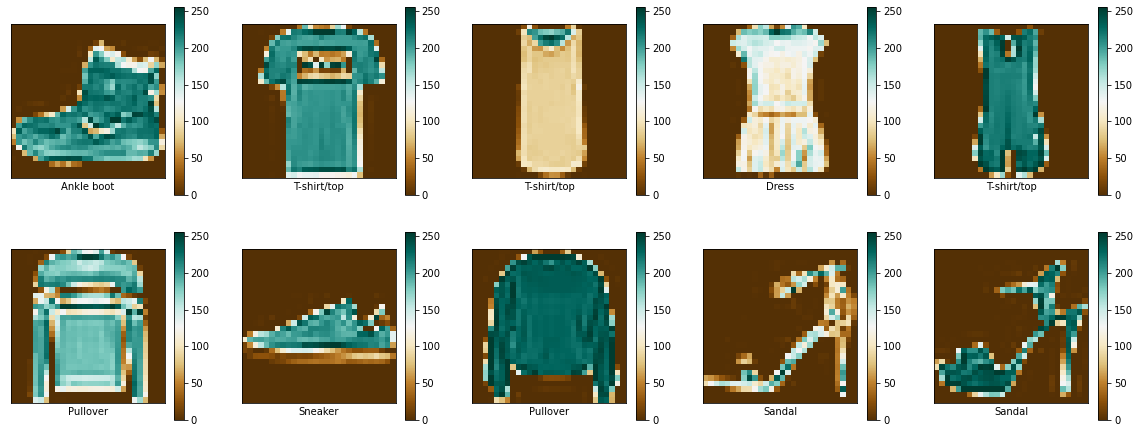

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20)) #figure with dimension of 20 by 20
for i in range(10): #first 10 images
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap='BrBG')
    plt.xlabel(class_names[y_train[i]])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th 
dimension to our data thereby changing the original image shape of (60000,28,28) 
to (60000,28,28,1)'''
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#Changing data tyoe to float and normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [22]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.2)
model.evaluate(x_test,y_test)

Epoch 1/10
1500/1500 [==============================] - 49s 26ms/step - loss: 0.8366 - accuracy: 0.6898 - val_loss: 0.4697 - val_accuracy: 0.8283
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.4369 - accuracy: 0.8389 - val_loss: 0.3838 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3652 - accuracy: 0.8663 - val_loss: 0.3610 - val_accuracy: 0.8644
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3216 - accuracy: 0.8820 - val_loss: 0.3453 - val_accuracy: 0.8733
Epoch 5/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2906 - accuracy: 0.8921 - val_loss: 0.3165 - val_accuracy: 0.8829
Epoch 6/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2700 - accuracy: 0.8990 - val_loss: 0.3356 - val_accuracy: 0.8802
Epoch 7/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2414 - accuracy: 0.9091 - val_loss: 0.3126 -

[0.34132933616638184, 0.8888999819755554]

In [35]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

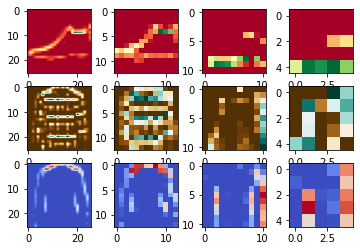

In [27]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='RdYlGn')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='BrBG')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='coolwarm')
  axarr[2,x].grid(False)

In [29]:
model.save('clothing_classification.h5')

In [30]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(filename):
    imge=load_img(filename,grayscale=True,target_size=(28,28))
    imge=img_to_array(imge)
    imge=imge.reshape(1,28,28,1)
    imge=imge.astype('float32')/255.0
    return imge

In [34]:
cloth=load_image('E:\Data-Science-Practice\Fashion_WebApp\Sample images\Sandal.png')
model=load_model('E:\Data-Science-Practice\Fashion_WebApp\clothing_classification.h5')
cloth_prediction=model.predict_classes(cloth)
print(cloth_prediction[0])
for i in range(len(class_names)):
    if cloth_prediction[0]==i:
        product=class_names[i]
        
print(product)

8
Bag
